In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/day-image/sunset-light-over-the-dark-city-aerial-photo-of-rails-wallpaper-preview.jpg
/kaggle/input/night-image/images (1).jpeg
/kaggle/input/night1/download.jpeg
/kaggle/input/night2/2560px-Glowing_Bar_City_Street_Night_Lights.jpg
/kaggle/input/day-and-night/day_night_images/training/night/20151104_231102.jpg
/kaggle/input/day-and-night/day_night_images/training/night/20151101_125509.jpg
/kaggle/input/day-and-night/day_night_images/training/night/20151102_184946.jpg
/kaggle/input/day-and-night/day_night_images/training/night/20151101_115515.jpg
/kaggle/input/day-and-night/day_night_images/training/night/20151102_030529.jpg
/kaggle/input/day-and-night/day_night_images/training/night/20151102_094933.jpg
/kaggle/input/day-and-night/day_night_images/training/night/20151109_003120.jpg
/kaggle/input/day-and-night/day_night_images/training/night/20151103_044539.jpg
/kaggle/input/day-and-night/day_night_images/training/night/20151102_013541.jpg
/kaggle/input/day-and-night/day_ni

In [3]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg  # for reading in images
import matplotlib.pyplot as plt
import cv2
import os ,glob
%matplotlib inline
import gc
import random

In [4]:
path_dataset = '/kaggle/input/day-and-night/day_night_images'
image_dir = os.listdir(path_dataset)
image_dir_training = os.path.join(path_dataset,image_dir[0])
image_dir_test =os.path.join(path_dataset,image_dir[1])
print(image_dir)
print(image_dir_training)
print(image_dir_test)

['training', 'test']
/kaggle/input/day-and-night/day_night_images/training
/kaggle/input/day-and-night/day_night_images/test


In [5]:
def load_dataset(images_dir):
    im_list =[]
    image_types =os.listdir(images_dir)
    for image_type in image_types :
        for fail in glob.glob(os.path.join(images_dir,image_type ,'*')) :
            im =cv2.imread(fail)
            im =cv2.cvtColor(im ,cv2.COLOR_BGR2RGB)
            if not im is None :
                im_list.append((im ,image_type))
    print(f'The DataSet is Loaded')
    return im_list

In [6]:
image_list_test =load_dataset(image_dir_training)
image_list_training = load_dataset(image_dir_test)
print(f'number of test images is : {len(image_list_test)}\nnumber of training images is : {len(image_list_training)}')

The DataSet is Loaded
The DataSet is Loaded
number of test images is : 240
number of training images is : 160


In [7]:
len(image_list_test)

240

In [8]:
len(image_list_training)

160

image Shape is : (372, 640, 3)


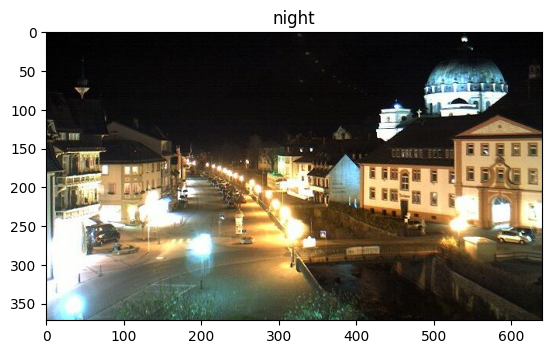

In [9]:
index= 20
image = image_list_training[index][0]
title =image_list_training[index][1]
plt.title(title)
plt.imshow(image)
print(f'image Shape is : {image.shape}')

In [10]:
# cv2.imshow('sdf',image)
# cv2.waitKey(0)

In [11]:
def standardize_input(image ,image_shape =(1000 , 700)):
    standar_image = cv2.resize(image , image_shape,interpolation=cv2.INTER_CUBIC)
    return standar_image

def encode(label):
    numerical_value = 0
    if label == 'day' :
        numerical_value =1
    return numerical_value

In [12]:
def standardize(image_list,image_shape=(128,128)):
    standard_list = []
    for item in image_list :
        image = item[0]
        label =item[1]
        standardized_im = standardize_input(image,image_shape)
        # standardized_im = avg_brightness(image,image_shape)
        binary_label =encode(label)
        standard_list.append((standardized_im , binary_label))
    print(f'The DataSet is Standrd and enconded ....')
    return standard_list

In [13]:
image_shape =(128,128)
standardize_traning = standardize(image_list_training)

The DataSet is Standrd and enconded ....


In [14]:
standardize_traning

[(array([[[ 4,  4, 16],
          [ 6,  6, 18],
          [ 7,  7, 19],
          ...,
          [ 2,  3,  8],
          [ 2,  3,  8],
          [ 2,  3,  8]],
  
         [[ 6,  6, 18],
          [ 7,  7, 19],
          [ 7,  7, 19],
          ...,
          [ 1,  2,  7],
          [ 2,  3,  8],
          [ 2,  3,  8]],
  
         [[ 3,  3, 15],
          [ 3,  3, 15],
          [ 4,  4, 16],
          ...,
          [ 1,  2,  7],
          [ 2,  3,  8],
          [ 2,  3,  8]],
  
         ...,
  
         [[ 8,  8,  8],
          [13, 13, 13],
          [ 4,  4,  4],
          ...,
          [ 2,  2,  2],
          [ 2,  2,  2],
          [ 2,  2,  2]],
  
         [[ 0,  0,  0],
          [ 0,  0,  0],
          [ 3,  3,  3],
          ...,
          [ 2,  2,  2],
          [ 2,  2,  2],
          [ 2,  2,  2]],
  
         [[ 0,  0,  0],
          [ 0,  0,  0],
          [ 1,  1,  1],
          ...,
          [ 2,  2,  2],
          [ 2,  2,  2],
          [ 2,  2,  2]]], dtype=u

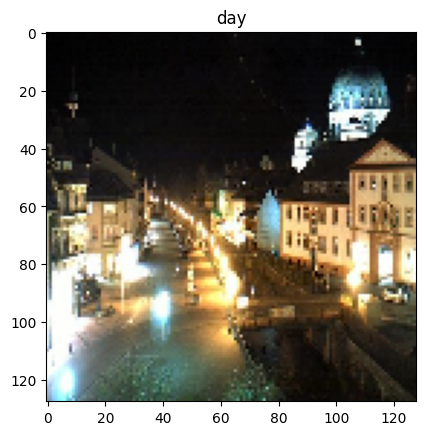

image Shape is : (128, 128, 3)
Label [1 = day, 0 = night] :  0


In [15]:
index= 20
image = standardize_traning[index][0]
title_code =standardize_traning[index][1]
if title_code==0 :
    title ='day'
else :
    title ='night'
plt.title(title)
plt.imshow(image)
plt.show()
print(f'image Shape is : {image.shape}')
print(f'Label [1 = day, 0 = night] :  {title_code}')

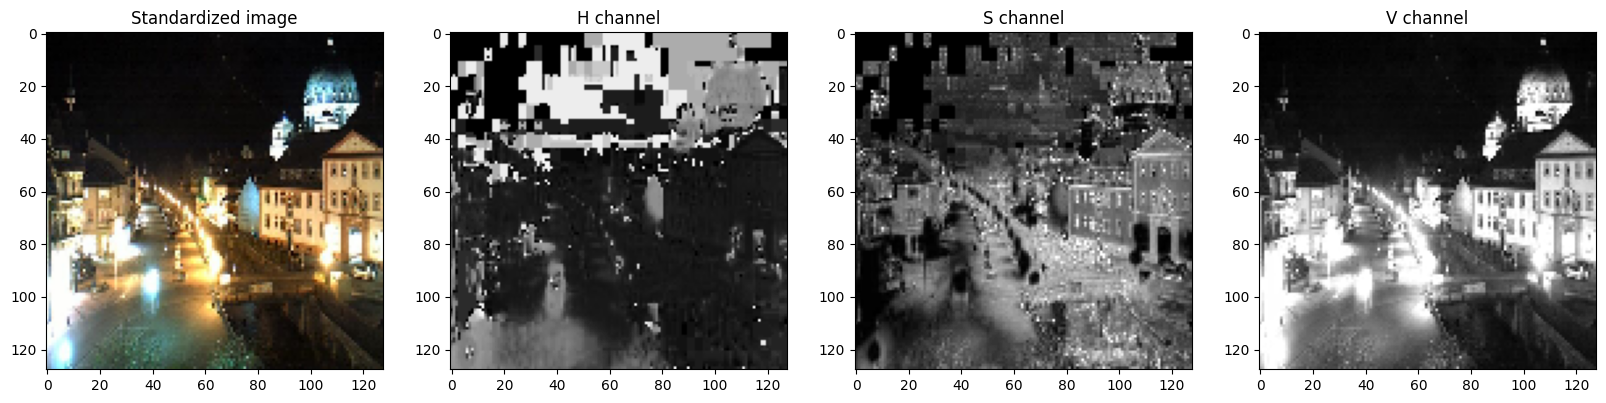

In [16]:
index= 20
image = standardize_traning[index][0]
title_code =standardize_traning[index][1]
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(image)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')
plt.show()

In [17]:
def avg_brightness(image_rgb,image_shape =(128 , 128)):
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(hsv[:,:,2])
    area = float(image_shape[0]*image_shape[1])
    average = sum_brightness/area
    return average

Average  brightness is : 2.300001515151515


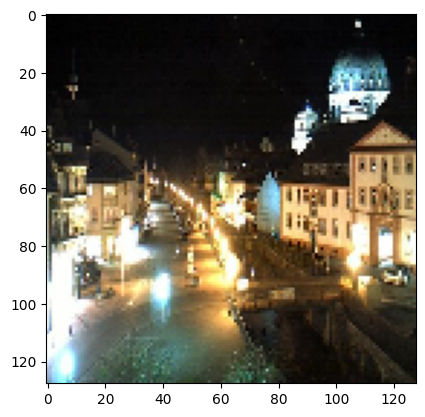

In [18]:
index =20
image_shape =(1100 , 600)
image = standardize_traning[index][0]
avg = avg_brightness(image , image_shape)
print(f'Average  brightness is : {avg}')
plt.imshow(image)
plt.show()

In [19]:
def estimate_label(rgb_image , threshold=1 ,image_shape =(128 , 128)):
    avg=avg_brightness(rgb_image ,image_shape)
    predicted_value =0
    if(avg > threshold):
        predicted_value = 1

    return predicted_value

In [20]:
standardize_testing =standardize(image_list_test)
random.shuffle(standardize_testing)
print(f'The test DataSet is Shuffled')

The DataSet is Standrd and enconded ....
The test DataSet is Shuffled


In [21]:
def get_misClasses(images,threshold=100 ,image_shape =(1100 , 600)):
    misClasses = []
    for i in images :
        image = i[0]
        label_true =i[1]
        predicted = estimate_label(image ,threshold ,image_shape)
        if predicted != label_true :
            misClasses.append((image , predicted))
    return misClasses

In [22]:
misClasses = get_misClasses(standardize_testing)
number_all = len(standardize_testing)
number_mis = len(misClasses)
number_correct =number_all-number_mis
accuracy =float(number_correct/number_all)
print(f'Number the Total Image is : {number_all}'+
      f'\nThe mis Classes is  :{number_mis}\n '+
      f'Accuracy is : {accuracy*100}%')

Number the Total Image is : 240
The mis Classes is  :120
 Accuracy is : 50.0%


## Day and Night identification using DEEP LEARNING

In [23]:
dataset=standardize_traning+standardize_testing

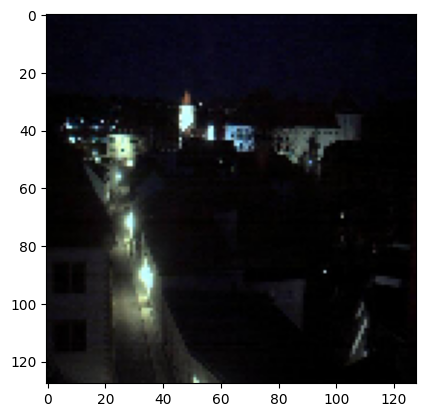

In [24]:
plt.imshow(dataset[0][0])

In [25]:
dataset[0][0]

array([[[ 4,  4, 16],
        [ 6,  6, 18],
        [ 7,  7, 19],
        ...,
        [ 2,  3,  8],
        [ 2,  3,  8],
        [ 2,  3,  8]],

       [[ 6,  6, 18],
        [ 7,  7, 19],
        [ 7,  7, 19],
        ...,
        [ 1,  2,  7],
        [ 2,  3,  8],
        [ 2,  3,  8]],

       [[ 3,  3, 15],
        [ 3,  3, 15],
        [ 4,  4, 16],
        ...,
        [ 1,  2,  7],
        [ 2,  3,  8],
        [ 2,  3,  8]],

       ...,

       [[ 8,  8,  8],
        [13, 13, 13],
        [ 4,  4,  4],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 3,  3,  3],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  1,  1],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]]], dtype=uint8)

In [26]:
df=pd.DataFrame(dataset)

In [27]:
len(df[0])

400

In [28]:
len(df[1])

400

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[0],df[1],test_size=0.2)

In [30]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

320
80
320
80


In [31]:
x_train[0].shape

(128, 128, 3)

In [32]:
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

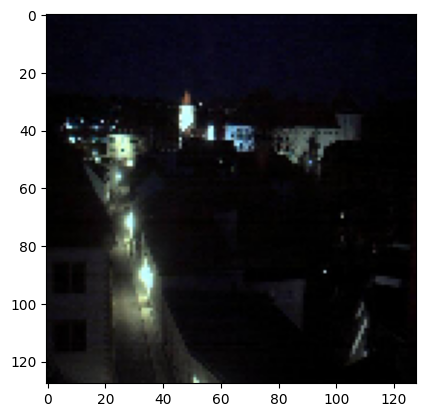

In [33]:
single_image = x_train[0]
plt.imshow(single_image,cmap='gray')

In [34]:
x_train_scaled[0].shape

(128, 128, 3)

In [35]:
x_train_resized = np.array([cv2.resize(img, (128, 128)) for img in x_train_scaled])
x_test_resized = np.array([cv2.resize(img, (128, 128)) for img in x_test_scaled])

In [36]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [37]:
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # To prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with softmax for binary classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,026 (12.64 MB)

 Trainable params: 3,313,026 (12.64 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(x_train_resized, y_train_categorical, epochs=20, batch_size=32, validation_data=(x_test_resized, y_test_categorical))

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 705ms/step - accuracy: 0.7017 - loss: 0.5146 - val_accuracy: 0.9125 - val_loss: 0.1542
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 602ms/step - accuracy: 0.9108 - loss: 0.1761 - val_accuracy: 0.9875 - val_loss: 0.0439
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 591ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9875 - val_loss: 0.0349
Epoch 16/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 579ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9875 - val_loss: 0.0458
Epoch 17/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 597ms/step - accuracy: 1.0000 - loss: 3.0891e-04 - val_accuracy: 0.9875 - val_loss: 0.0560
Epoch 18/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 591ms/step - accuracy: 1.0000 - loss: 7.1503e-05 - val_accuracy: 0.9875 - val_loss: 0.0618
Epoch 19/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 584ms/step - accuracy: 1.0000 - loss: 1.8444e-04 - val_accuracy: 0.9875 - val_loss: 0.0634
Epoch 20/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 591ms/step - accuracy: 1.0000 - loss: 3.8708

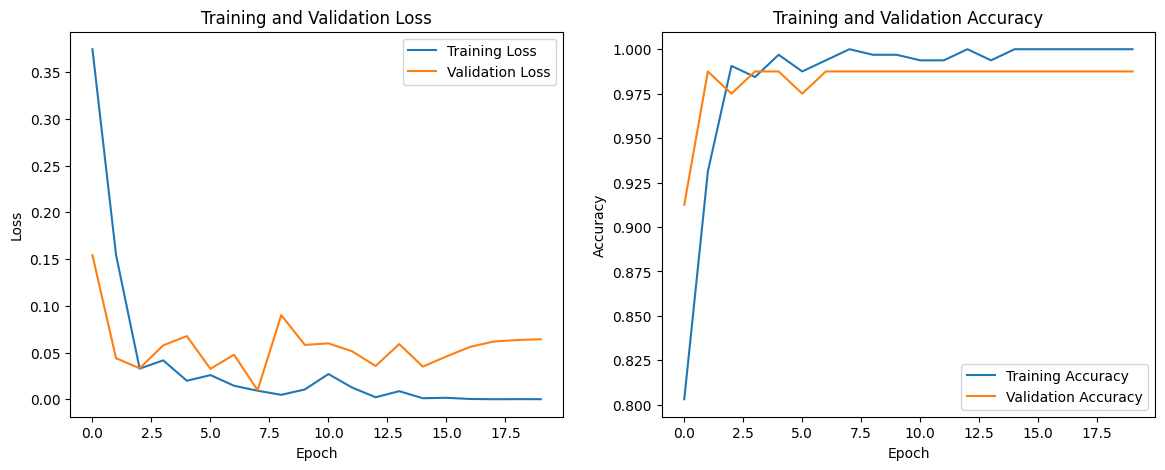

In [40]:
import matplotlib.pyplot as plt

# Retrieve the training history
history_dict = history.history

# Plot training & validation loss values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [41]:
test_loss, test_acc = model.evaluate(x_test_resized, y_test_categorical)
print(f'Test accuracy: {test_acc * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9898 - loss: 0.0522
Test accuracy: 98.75%


In [42]:
def predict_image(image):
    # Preprocess the image
    image_resized = cv2.resize(image, (128, 128))
    image_resized = image_resized / 255.0
    image_resized = np.expand_dims(image_resized, axis=0)

    # Predict
    prediction = model.predict(image_resized)
    predicted_class = np.argmax(prediction, axis=1)
    return 'day' if predicted_class == 1 else 'night'

# Example prediction
sample_image_url = '/kaggle/input/night2/2560px-Glowing_Bar_City_Street_Night_Lights.jpg'
sample_image =cv2.imread(sample_image_url)
# print(sample_image)
prediction = predict_image(sample_image)
print(f'The predicted class is: {prediction}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
The predicted class is: night


In [1]:
from tensorflow.keras.models import save_model

# Save the entire model
model.save('model.h5')

NameError: name 'model' is not defined